<center>
<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/AB.jpeg?raw=true" height="200">

# Андан на экономе: домашнее задание 4
## Проверка гипотез и А/Б-тестирование
</center>


**ФИО:** Семенов Всеволод Алексеевич

**id из контеста:** dap_econ_2022_223

> Снова он, только зелёный 0_0

## Общая информация


__Дата выдачи:__ 17.05.2023

__Мягкий дедлайн:__ 23:59MSK 10.06.2023

__Жесткий дедлайн:__ 23:59MSK 16.06.2023

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 100 баллов. За каждый день просрочки после мягкого дедлайна снимается 10 баллов. После жёсткого дедлайна работы не принимаются. Даже при опозданиии на одну секунду. Сдавайте работы заранее.

Мягкий дедлайн можно отодвинуть без потери баллов на 1,2 или 3 дня. Суммарно для откладывания в запасе есть три дня. Можно отодвинуть один дедлайн на три дня, а можно три дедлайна подвинуть на один день. Распоряжаться этими днями студент может как угодно. Жёсткий дедлайн, при этом, не меняется. Если такое произошло, нужно сообщить о сдвиге при сдаче работы.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Любой из студентов может быть вызван на защиту любого домашнего задания. В таком случае итоговая оценка студента определяется в результате защиты.

> За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено.

> Выводы должны быть релевантными. Не забывайте их писать. Если в вопросе требуется ответ словами, а его нет, вы будете терять довольно много баллов.

> Фиксируйте все seed'ы, random_state'ы и тд - ваш код должен быть воспроизводим с теми же результатами.

## Присяга недопрограммиста

Положа руку на сердце, готов поклясться, что все представленные ниже коды были написаны лично мной и только мной, я не копипастил ни одного номера и не взял ни одного фрагмента кода, единственное, что я брал из интернета, это мемы, что отражали моё настроение во время написания (Если иного не указано:) ), любые совпадения с другими кодами случайны и я готов отстаивать эту позицию до последнего

## Успокаивающая музыка

https://youtu.be/0-NW47sXur0 - ещё со школы под это что-то делаю

https://youtu.be/WZq643oKyW8 - ежели вы так же как и я любите группу "Би-2"

https://youtu.be/U_tyfMUSGo4?t=15 - ежели вы так же как и я любите группу "AC-DC"

## Формат сдачи

Сам ноутбук называйте в формате hw-04-USERNAME.ipynb, где USERNAME — ваши фамилия и имя. Файл сдаётся в anytask.

## Импорт необходимых библиотек

Импортируйте все используемые библиотеки здесь.

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as sts
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
import math

import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict

In [ ]:
# Отключение некоторых лишних предупреждений
import warnings
warnings.filterwarnings("ignore")

In [ ]:
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (8, 4)

# Часть 1: Процедура проверки гипотез

Для начала повторим теорию проверки гипотез и поотвечаем на различные вопросы.

> Ниже вас ждут несколько примеров гипотез, на которые вам нужно получить статистически значимые ответы. Вы можете пользоваться встроенными функциями тестов, можете писать свои, а можете использовать с семинаров – это не влияет на полученные баллы. Вы также оставляете за собой право выбрать, проверять гипотезу через `p-value` или по критическим точкам или вообще по доверительным интервалам (но здесь будьте осторожнее, особенно, когда у вас 2 выборки).

__Здесь важно:__

- Правильно посчитать `p-value` либо наблюдаемое значение критерия (либо дов. интервал);
- Правильно сделать вывод об отвержении / не отвержении нулевой гипотезы;
- Правильно выбрать тест для проверки и обосновать, почему вы выбрали именно его.

Гипотезы проверяйте на $5\%$ уровне значимости

## Задача №1: Экзамен

<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/exam.jpeg?raw=true" width="400" align='left'>

У вас есть набор данных об оценках студентов на экзамене. Каждая строка в датасете – отдельный студент. Датасет представляет собой следующие колонки:

* `gender` – пол
* `race/ethnicity` – раса / этническая принадлежность
* `parental level of education` – уровень образования
* `lunch` – получает ли бесплатные обеды (тип питания)
* `test preparation course` – прошел ли курсы по подготовке к тесту
* `math score` – баллы за математику
* `reading score` – баллы за чтение
* `writing score` – баллы за письменность

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/hse-econ-data-science/andan_2023/main/hw/hw04/data/students_exam.csv')

In [ ]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


__а)__ __[5 баллов]__  Проверьте гипотезу о том, что студенты, получившие высшее образование (associate's degree, bachelor's degree, master's degree) в среднем пишут математику на большее число баллов, чем студенты со средним образованием (high school, some high school, some college).

Уровень значимости: $5\%$

$$
\begin{aligned}
& H_0: \mu_{high} = \mu_{middle} \\
& H_1: \mu_{high} > \mu_{middle}
\end{aligned}
$$

__Подсказка:__ В тесте 2 выборки: студенты с высшим образованием и со средним. Подумайте о том, как эти выборки связаны между собой. Также обратите внимание на альтернативную гипотезу!

In [ ]:
# your code here
# (⌒_⌒)

df_high = df.loc[(df['parental level of education'] == "associate's degree") |
                 (df['parental level of education'] == "bachelor's degree") |
                 (df['parental level of education'] == "master's degree")]

df_middle = df.loc[(df['parental level of education'] == "high school") |
                 (df['parental level of education'] == "some high school") |
                 (df['parental level of education'] == "some college")]

alpha = 0.05
z_crit = sts.norm.ppf(1 - alpha)

In [ ]:
df_high.info(), df_middle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399 entries, 0 to 995
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       399 non-null    object
 1   race/ethnicity               399 non-null    object
 2   parental level of education  399 non-null    object
 3   lunch                        399 non-null    object
 4   test preparation course      399 non-null    object
 5   math score                   399 non-null    int64 
 6   reading score                399 non-null    int64 
 7   writing score                399 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 28.1+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 601 entries, 1 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       601 non-null    object


(None, None)

In [ ]:
# Я планировал считать вручную, но потом передумал

high_math = df_high['math score'].mean()
middle_math = df_middle['math score'].mean()

high_var = df_high['math score'].var()
middle_var = df_middle['math score'].var()

high_math, middle_math, high_var, middle_var

(68.60401002506266, 64.41930116472545, 226.59154166824098, 225.51056017748198)

В расчётах использовал статистику, представленную ниже

P.s. Большое спасибо Илье Сергеевичу Слаболицкому за полезный файлик, прикреплю его к письму

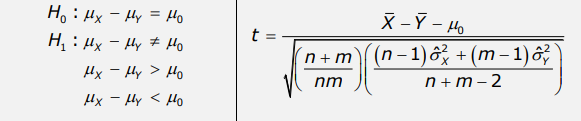

In [ ]:
# а потом ещё раз передумал и пересчитал, чтобы удостовериться

t_obs = (high_math - middle_math) / np.sqrt( ((399 + 601) / (399*601)) * ((398 * high_var + 600 * middle_var) / 998))
t_obs

4.311126649886475

In [ ]:
t_stat, p_value = ttest_ind(df_high['math score'], df_middle['math score'], alternative='greater')
t_stat, p_value

(4.311126649886476, 8.926343543260077e-06)

In [ ]:
sts.t.ppf(1 - alpha, 998) # прям как у нормального, что в принципе с таким немалым количеством степеней свободы неудевительно

1.6463818766348755

__Почему вы выбрали для проверки гипотезы именно тот критерий, что вы выбрали? Какие у него предпосылки? Все ли они выполняются с данными?__

__Ответ:__ <br>
Во-первых, в случае, когда нам не известно о выборках ничего, кроме их нормального распределения (среднее по асимптотике сходится к нормальному при большом количестве наблюдений, т.е. более 30-40), стоит использовать т-тест, а именно представленную выше формулу. <br>

Во-вторых, нам не было дано ни матожидания, ни дисперсии, данных много, значит пользуемся упомянутой асимтотикой и готовыми формулами => *предпосылки выполняются* <br>

Как итог __Н0__ отвергается, что в принципе изначально было очевидно, ибо дисперсии +- одинаковые, а матожидания заметно различаются


P.s. не исключаю вероятности того, что я немного дурачок и тут нужно было проводить z-тест, ибо у нас достаточно большие выборки, а стьюдент скорее ориентирован на малые, но имеем, что имеем

P.p.s. Выборки естественно независимые, но я думаю, что это предполагается по условию, выбросов в принципе быть не может ввиду того, что баллы не ухлодят дальше сотни

__б)__ __[5 баллов]__  Правда ли что в среднем студенты пишут экзамен по `reading` так же, как и по `math`?

Уровень значимости: $5\%$

$$
\begin{aligned}
& H_0: \mu_{math} = \mu_{reading} \\
& H_1: \mu_{math} \neq \mu_{reading}
\end{aligned}
$$

__Подсказка:__ В тесте 2 выборки: баллы по чтению и баллы по математике. Подумайте о том, как эти выборки связаны между собой. Также обратите внимание на альтернативную гипотезу!

In [ ]:
# your code here
# (＠_＠)

mean_math = df['math score'].mean()
mean_reading = df['reading score'].mean()

var_math = df['math score'].var()
var_reading = df['reading score'].var()

mean_math, mean_reading, var_math, var_reading, np.corrcoef(df['math score'], df['reading score'])

(66.089,
 69.169,
 229.91899799799796,
 213.16560460460462,
 array([[1.        , 0.81757966],
        [0.81757966, 1.        ]]))

Видимо чтение пишут лучше, обратной связи вроде бы нет, вспоминается пример с лекции Коссовой Е.В. , но тут он очевидно не работает <br>

Поскольку предпосылки остались теми же, используем t-тест

In [ ]:
t_crit_right = sts.t.ppf(1 - alpha / 2, 998) # опять крайне близко к нормальному, можно сказать равно ему
t_crit_left = -t_crit_right

t_obs_1 = (mean_math - mean_reading) / np.sqrt( ((1000 + 1000) / (1000*1000)) * ((999 * var_math + 999 * var_reading) / 998))
t_obs_1, (t_crit_left, t_crit_right)

(-3.270204531647394, (-1.9623438462163336, 1.9623438462163336))

In [ ]:
# Для проверки

t_stat, p_value = ttest_ind(df['math score'], df['reading score'], alternative='two-sided')
t_stat, p_value

(-4.627084038100885, 3.946445546435526e-06)

__Почему вы выбрали для проверки гипотезы именно тот критерий, что вы выбрали? Какие у него предпосылки? Все ли они выполняются с данными?__

__Ответ:__ Причины выбора и предпосылки расписаны ранее <br>

Странно, что в этот раз при подсчётах вручную результат не совпал с функцией, однако это всё равно особо ни на что не влияет, ибо __H0__ всё равно отвергается

## Задача №2:  О мышах и людях

<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/vagon.jpeg?raw=true" width="400" align='left'>

Для изучения аспектов процесса принятия моральных решений психологи уже много лет используют этические дилеммы, с помощью которых оценивают действия людей в гипотетических ситуациях. Один из самых известных примеров — это [проблема вагонетки,](https://ru.wikipedia.org/wiki/Проблема_вагонетки) в которой необходимо принять решение о том, стоит ли пожертвовать одним человеком для спасения пятерых.

Бельгийские психологи воплотили дилемму в реальную жизнь. Участники эксперимента должны были выбрать, ударить током пять мышей или одну мышь. Эксперимент проходил следующим образом. Участника сажали перед двумя клетками, в одной из которых сидели пять мышей, а в другой — одна. Перед клетками стоял ноутбук с $20$-секундным таймером: участникам сообщили, что по истечении этих $20$ секунд в клетку с пятью мышами пустят ток, и мыши получат не смертельный, но очень болезненный удар. Пока время идет, участник может нажать на кнопку: в этом случае ток пустят по клетке с одной мышью. В исследовании использовали живых мышей.

Удары тока были ненастоящими: сразу же после «удара» участников сопроводили в отдельную комнату, где разъяснили им, что мыши в полном порядке и током их не били (об этом заранее догадались только $12$ участников). В решении реальной проблемы вагонетки приняли участие $192$ человека, а еще $83$ решали такую же задачку, но гипотетическую (на бумаге). Все участники также прошли онлайн-опросы, в ходе которых учёные собрали о респондентах кучу дополнительной информации.

В файле `mouse.csv` лежит информация о том, как прошёл эксперимент. Нас будут интересовать столбцы:

* __STUDY:__ какую проблему вагонетки решал человек $1$, если на бумаге и $2$, если реальную
* __AGE:__ возраст респондента
* __GENDER:__ пол респондента
* __DECISION:__ решение дилеммы ($1$ - жать на кнопу, $0$ - не жать)
* __RT:__ время, которое респондент потратил, чтобы нажать на кнопку

Подробное описание данных, сами данные и даже код на R, использованный при оценивании моделей, можно найти в [репозитории исследования.](https://osf.io/kvb99/) В статье авторы строили несколько логистических регрессий, чтобы очистить эффект от психологических особенностей респондентов. Про подобные приёмы очистки мы немного поговорим позже.  Также более подробно про исследование [можно почитать на N + 1.](https://nplus1.ru/news/2018/05/11/mice-trolley)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/hse-econ-data-science/andan_2023/main/hw/hw04/data/mouse.csv', sep='\t')

# отбираем нужные колонки
df = df[['STUDY', 'AGE', 'GENDER', 'DECISION', 'RT']]

# удаляем пропуски по колонке DECISION (то есть тех, кто не смог принять решение)
df = df[~df.DECISION.isnull()]

In [ ]:
df

,STUDY,AGE,GENDER,DECISION,RT
3,1,21,0,1.0,9.212427
4,1,20,0,1.0,17.071711
5,1,21,1,1.0,9.827884
6,1,23,1,1.0,10.143030
7,1,20,1,1.0,7.447534
...,...,...,...,...,...
286,2,20,1,1.0,NaN
287,2,21,1,1.0,NaN
288,2,19,0,0.0,NaN
289,2,21,0,1.0,NaN


__а)__ __[5 баллов]__ Попытаемся ответить на тот же вопрос, что и исследователи. В какой из двух ситуаций респонденты чаще принимают решение нажать кнопку: в реальной или на бумаге?

Уровень значимости: $5\%$

$$
\begin{aligned}
&H_0: \hspace{2mm} p_1 = p_2 \hspace{2mm} \text{(На бумаге и в реальности жмут на кнопку одинаково часто)} \\
&H_1: \hspace{2mm} p_1 > p_2  \hspace{2mm} \text{(На бумаге на кнопку жмут чаще)}
\end{aligned}
$$

In [ ]:
# your code here
# (￢_￢)

df_paper = df.loc[df['STUDY'] == 2]
df_real = df.loc[df['STUDY'] == 1]

p_paper = df_paper['DECISION'].mean()
p_real = df_real['DECISION'].mean()

var_paper = df_paper['DECISION'].var() # вручную получается чуть меньше, почему - загадка
var_real = df_real['DECISION'].var()

p_paper, p_real, var_paper, var_real

(0.7469879518072289,
 0.8645833333333334,
 0.19130179253599763,
 0.11769197207678882)

In [ ]:
df_paper.info()
df_real.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 208 to 290
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STUDY     83 non-null     int64  
 1   AGE       83 non-null     int64  
 2   GENDER    83 non-null     int64  
 3   DECISION  83 non-null     float64
 4   RT        0 non-null      float64
dtypes: float64(2), int64(3)
memory usage: 3.9 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 3 to 207
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STUDY     192 non-null    int64  
 1   AGE       192 non-null    int64  
 2   GENDER    192 non-null    int64  
 3   DECISION  192 non-null    float64
 4   RT        166 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 9.0 KB


*Самовольное примечание*

В задании что-то напутали видимо, так как 1 это не бумага, да и в таком случае гипотеза как будто бы потеряет смысл, ибо наша z-статистика получится отрицательной, а тест проводится на правой части распределения, так что сделаю всё по своему:

alpha = 0.05 <br>
H0: p_real == p_paper <br>
H1: p_real > p_paper

In [ ]:
# Тут вроде бы только вручную возможно, по крайней мере я таких функций не встречал

z_obs = (p_real - p_paper) / np.sqrt((var_real / 192) + (var_paper / 83))

alpha = 0.05
z_crit = sts.norm.ppf(1 - alpha)

z_obs, z_crit

(2.1770130122338434, 1.6448536269514722)

__Проверка через Z-статистику для распределения Бернули:__<br>

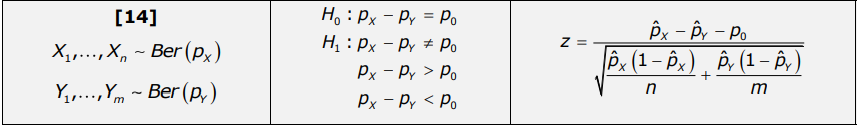

__Почему вы выбрали для проверки гипотезы именно тот критерий, что вы выбрали? Какие у него предпосылки? Все ли они выполняются с данными?__

__Ответ:__ Выбрал такой, ибо в данных присутствовало всего 2 значения (да / нет), потому имеет место распределение Бернули. Предпосылки выполняются, ибо параметры неизвестны, выборки очевидно из Бернули и данных на грани хватает для подобного теста (я знаю, что формальный минимум - это 30 наблюдений, но личше, чтобы их было хотя бы 80+ для корректного отображения)

__б)__ __[5 баллов]__  Кровожадные люди быстро берут на себя ответственность за удар мышки током. Будем считать, что кровожадные люди принимают решение менее, чем за пять секунд. Правда ли, что люди по своей природе кровожадные?

Уровень значимости: $5\%$

$$
\begin{aligned}
&H_0: \hspace{2mm} \mu \le 5 \hspace{2mm} \text{(Люди кровожадны)} \\
&H_1: \hspace{2mm} \mu > 5  \hspace{2mm} \text{(Люди не кровожадны)}
\end{aligned}
$$

*Примечание*

Для данного теста использовалась следующая статистика, вроде бы он правосторонний, несмотря на необычную формулировку <br>

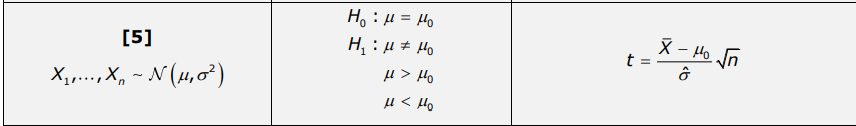

In [ ]:
# your code here
# (⊙_⊙)

df_blood = df.loc[(df['RT'] > 0)]

blood_mean = df_blood['RT'].mean()
blood_var = df_blood['RT'].var()

m_mean = 5

blood_mean, blood_var # как будто бы мы вновь отвергнем нашу гипотезу

(10.116762704819276, 25.816114201798282)

In [ ]:
df_blood.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166 entries, 3 to 207
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STUDY     166 non-null    int64  
 1   AGE       166 non-null    int64  
 2   GENDER    166 non-null    int64  
 3   DECISION  166 non-null    float64
 4   RT        166 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 7.8 KB


In [ ]:
t_obs = (blood_mean - m_mean) / np.sqrt(blood_var / 166)

t_crit = sts.t.ppf(1 - alpha, 165)

t_obs, t_crit # видимо люди действительно не кровожадны, хотя я бы в их компанию приписал тех, кто вовсе не нажал

(12.974895950977869, 1.6541409762941324)

__Почему вы выбрали для проверки гипотезы именно тот критерий, что вы выбрали? Какие у него предпосылки? Все ли они выполняются с данными?__

__Ответ:__ Вновь взял t-тест, ибо дисперсия неизвестна, среднее по асимтотике сходится к нормальному, у нас неплохая по объёму выборка (>100 хватает дял большей части тестов) <br>

Как мы видим, все предпосылки выполнены, тестовые значения получены, а потому вновь придётся сказать, кхм кхм, написать, что __Н0 отвергается__

## Задача №3:  Парадокс

<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/simpson.jpg?raw=true" width="350" align='left'>

Помимо решения задач и применения различных функций из библиотек необходимо очень аккуратно работать с данным и понимать, какие действия корректны, а какие нет. Перед вами результаты медицинских исследований:

- из $1650$ мужчин, принимавших лекарство, выздоровели $770$,
- из $223$ мужчин, не принимавших лекарство, выздоровели $88$,
- из $245$ женщин, принимавших лекарство, выздоровели $165$,
- из $750$ женщин, не принимавших лекарство женщин, выздоровели $440$.

Необходимо найти ответы на следующие вопросы:

1. Влияет ли лекарство на мужчин?
2. Влияет ли лекарство на женщин?
3. Влияет ли лекарство на людей обоих полов в целом?

Будем считать, что исследование проводилось методом двойного слепого тестирования. Врач не знал, даёт ли он пациенту плацебо или лекарство, пациент не знал, пьёт ли он плацебо или лекарство.

Запишем данные в табличку. Пусть $A$ — принимавшие лекарство, $\overline{A}$ — не принимавшие лекарство, $B$ — выздоровевшие, $\overline{B}$ — не выздоровевшие.

<!--<img width="60%" src="pics/pic2.png">-->
<table>
<tr><td>
    
|Мужчины| $B$ |  $\overline{B}$|
|--|--|--|
|$A$| 770 | 880 |
|$\overline{A}$| 88 | 135 |

</td><td>
    
|Женщины| $B$ |  $\overline{B}$|
|--|--|--|
|$A$| 165 | 80 |
|$\overline{A}$| 440 | 310 |

</td><td>

|Вместе| $B$ |  $\overline{B}$|
|--|--|--|
|$A$| 935 | 960 |
|$\overline{A}$| 528 | 445 |

</td></tr> </table>

Для решения задачи воспользуйтесь критерием хи-квадрат Пирсона. Мы его не разбирали на семинарах, однако на курсе матстата он у вас был. Вспомнить как он работает можно [в этом видео.](https://www.youtube.com/watch?v=bws1CB9XZ6E&list=PLCf-cQCe1FRyCcf47wwBlDObNcz4ud2_L&index=10) Посмотреть на код можно [в этом видео.](https://www.youtube.com/watch?v=H3NtBN_o-hk&list=PLCf-cQCe1FRyCcf47wwBlDObNcz4ud2_L&index=12) Тетрадку с кодом можно [найти тут.](https://github.com/FUlyankin/matstat-AB/blob/main/week10_nonparam_bootstrap/04_05_python_kolmogorov_pearson.ipynb)

Тест поможет нам понять, есть ли у лекарства какой-то эффект. Применить тест в python помогает функция `chi2_contingency` из пакета `scipy.stats`. Используйте её с параметром `correction=False`.

__а)__ __[5 баллов]__ Давайте попробуем найти ответ на вопрос, есть ли эффект от лекарства для мужчин?

Давайте предварительно посчитаем долю выздровевших мужчин, которые принимали лекарство и долю выздровевших мужчин, которые не принимали лекартсво. Сравните эти доли.

In [ ]:
# your thoughts here
# (◕‿◕)♡

p_A_B = 770 / (770 + 880)
p_neA_B = 88 / (88 + 135)

p_A_B, p_neA_B # как будто бы есть некоторая закономерность, лучше принять лекарство

(0.4666666666666667, 0.39461883408071746)

Создадим матрицу размера $2 \times 2.$ Внесём в неё частоты, полученные для мужчин.

In [ ]:
men = np.array([[770,880],
                [88,135]])

Примените тест с параметром `correction=False` и сделайте выводы на уровне значимости $5\%.$

In [ ]:
# your code here
# (￢_￢)

chi2_contingency(men, correction=False)


Chi2ContingencyResult(statistic=4.107854906463222, pvalue=0.04268446899604581, dof=1, expected_freq=array([[755.84623599, 894.15376401],
       [102.15376401, 120.84623599]]))

*Примечание*

Как мы можем видеть, p-value меньше 0.05 => **Н0 отвергается**

__б)__ __[10 баллов]__ Сделайте всё то же самое, но руками, без помощи библиотеки.

Для того, чтобы расчитать тестовую стаститику хи-квадрат, нам необходимо найти матрицу ожидаемых частот, такую же, которая у нас получилась в предыдущем пункте в output-е функции `chi2_contingency`.

Используя матрицу из предыдущего пункта, посчитайте общее количество испытуемых мужчин.

In [ ]:
# your code here
# (￢_￢)

men_1 = np.array([[755.84623599, 894.15376401],
                  [102.15376401, 120.84623599]])

Посчитайте отдельно количество испытуемых мужчин, которые принимали лекарство, и которые не принимали его $(n1, n2)$

In [ ]:
# your code here
# (￢_￢)

n1 = 755.84623599 + 894.15376401
n2 = 102.15376401 + 120.84623599

n1, n2

(1650.0, 223.0)

Найдите вероятности выздороветь или нет (независимо от группы по приему/не приему лекарства), то есть вероятность попасть в $B$ и $\overline{B}$ для мужчин.

In [ ]:
# your code here
# (￢_￢)

B = (755.84623599 + 102.15376401) / np.sum(men_1)
neB = (894.15376401 + 120.84623599) / np.sum(men_1)

B, neB

(0.4580886278697277, 0.5419113721302723)

Расчитайте ожидаемые (теоритические) значения для каждой ячейки матрицы. Для этого перемножьте вероятности из предыдущего пункта со значениями $n_1$ и $n_2$. Полученную матрицу можно сравнить с выводом библиотеки`scipy.stats`, она должна быть идентичной.

In [ ]:
# your code here
# (￢_￢)

test_men = np.array([[n1*B, n1*neB],
                    [n2*B, n2*neB]])
test_men

array([[755.84623599, 894.15376401],
       [102.15376401, 120.84623599]])

Расчитайте наблюдаемую статистику и найдите `p_value` с помощью `sts.chi2.cdf` с параметром `df=1`.

\begin{equation*} \chi^2_d = \sum {\frac {(O-E)^2}{E}},\end{equation*}

где

- $E$ - наши ожидаемые частоты(матрица из предыдущего пукта),
- $O$ - наблюдаемы частоты(первоначальная матрица).

In [ ]:
# your code here
# (￢_￢)

chi_obs = np.sum(((men - test_men)**2) / test_men)
p_value_1 = sts.chi2.cdf(chi_obs, df=1)
chi_crit = sts.chi2.ppf(0.95, df=1)

chi_obs, 1 - p_value_1, chi_crit

(4.107854906463222, 0.04268446899604583, 3.841458820694124)

__в)__ __[5 баллов]__  Ответьте на вопрос: есть ли эффект от лекарства для женщин? (повторите процедуру пункта а)

Как и в предыдущий раз, для начала, посчитайте долю выздровевших женщин, которые принимали лекарство и долю выздровевших женщин, которые не принимали лекартсво. Сравните эти доли.

In [ ]:
# your code here
# (￢_￢)

p_A_B = 165 / (165 + 80)
p_neA_B = 440 / (440 + 310)

p_A_B, p_neA_B # вроде бы им нужно принимать лекарство

(0.673469387755102, 0.5866666666666667)

165	80


440	310

Создайте матрицу с данными из таблицы по женщинам, примените тест с параметром `correction=False` и сделайте выводы на уровене значимости $5\%$.

In [ ]:
# your code here
# (￢_￢)

women = np.array([[165, 80],
                 [440, 310]])

chi2_contingency(women, correction=False)

Chi2ContingencyResult(statistic=5.838444095586957, pvalue=0.015679686056826774, dof=1, expected_freq=array([[148.96984925,  96.03015075],
       [456.03015075, 293.96984925]]))

*Примечание*

Видимо ранее я ошибся, ибо связь имеется и она даже сильнее, чем в первом случае, т.к. p_value меньше 0.05 => **Н0 отвергается**

__г)__ __[5 баллов]__  Ответьте на вопрос: есть ли эффект от лекарства для объединенной группы?

935	960

528	445


In [ ]:
# your code here
# (￢_￢)

p_A_B = 935 / (935 + 960)
p_neA_B = 528 / (528 + 445)

p_A_B, p_neA_B # вроде бы им не нужно принимать лекарство

(0.49340369393139843, 0.5426515930113053)

Соотносится ли это с результатами по группам мужчин и женщин, взятых отдельно?

In [ ]:
# your thoughts here
# (◕‿◕)♡

people = np.array([[935, 960],
                  [528, 445]])

p = chi2_contingency(people, correction=False)

p, sts.chi2.ppf(0.95, df = 1)

(Chi2ContingencyResult(statistic=6.239588767305169, pvalue=0.012492547994073244, dof=1, expected_freq=array([[966.66143654, 928.33856346],
        [496.33856346, 476.66143654]])),
 3.841458820694124)

*Примечание*

Если с хи-квадратом мало что изменилось, выборки всё также зависимы, то вот вероятности теперь говорят об обратном, этого бы не случилось, если бы доли выданных и не выданных лекарств были равны, но увы

Вроде бы в этом и был смысл, если я правильно понял суть парадокса

## Что произошло?

Если вы все сделали правильно, скорее всего у вас получились противоречивые значимые результаты. Давайте разберемся почему это так.

Может произойти такая ситуация, что новое лекарство может оказаться эффективным в каждом из отдельных исследований, на каждой отдельной группе, но объединение результатов укажет на то, что это лекарство либо бесполезно, либо вредно. [Это называется __парадокс Симпсона.__](https://ru.wikipedia.org/wiki/Парадокс_Симпсона) Он довольно часто встречается на практике в разном виде.

Проблема здесь в том, что объединять эти выборки просто слив данные вместе — нельзя. Контрольные группы людей, не принимавших лекарство, занимают разный объем от выборок — примерно 12% в случае мужчин и 75% в случае женщин.

*Пхпхпх, стоило прочитать чуть больше и получить те же выводы*

# Часть 2: А/Б-тестирование

## Задача №4: Не подглядывать!

<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/trump.png?raw=true" width="500" align='left'>

На американских выборах 2020 года в некоторых штатах проходила очень конкурентная борьба между кандидатами. По мере подсчета голосов перевес в голосах склонялся то в пользу демократов, то в пользу республиканцев. И вот, в один из таких моментов, когда чаша весов склонилась в пользу республиканцев, Д. Трамп написал в твиттер "stop the count!", что означало призыв к остановке подсчета голосов.

_Здесь у вас мог возникнуть вопрос, и зачем нам это?_

Ответ очень прост. В этой ситуации всем очевидно, что призыв Трампа не мог быть осуществлен, то есть прерывать подсчет голосов раньше времени кажется довольно глупым способом выявления победителя. И вот абсолютно такой же способ принятия решения есть и в А/Б-тестах, только теперь многим аналитикам он уже кажется не столь очевидным, что приводит к существенным ошибкам в заключении выводов.

_Решив эту задачу, мы познакомимся с такой проблемой подробнее и поймем, как не стоит делать, когда вы запускаете А/Б-тест._

Чтобы понять, в чем же именно заключается проблема, мы с вами будем проводить симуляции А/Б-тестов. Это когда мы генерируем данные уже со знаниями, как эти данные устроены. А затем, запуская процедуру проверки гипотез над такими симулированными данными, мы будем оценивать, что происходит на практике (при запуске А/Б-теста).

На практике же всегда неизвестно, как устроены данные, и проводя А/Б-тест мы пытаемся зафиксировать различия. Еще раз, здесь же мы будем знать об устройстве данных, а затем будем смотреть на поведение А/Б-теста, то есть как будто бы смотреть на тест с обратной стороны.

_Перед тем как идти дальше, остановитесь здесь и еще раз зафиксируйте это!_

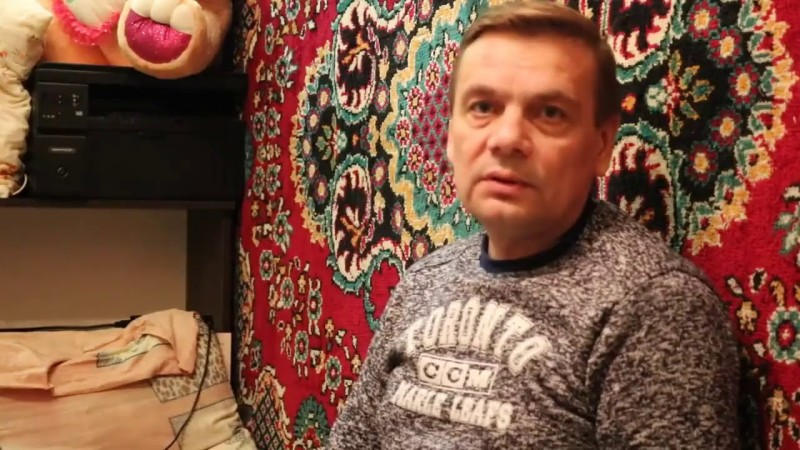

__а) [10 баллов]  Подсчет размера выборки для А/Б-теста__

Предположим, что вы хотите провести А/Б-тест внутри вашего приложения. Вы выбрали некоторую метрику $X$ – случайную величину из нормального распределения с мат. ожиданием $100$ у.е. и стандартным отклонением $40$ у.е – это ваш бейзлайн (группа А). Рассчитайте, сколько дней вам нужно крутить такой А/Б-тест, если:

1. Вы ожидаете получить минимальный размер эффекта в $5$ у.е.;
2. Вы хотите зафиксировать ошибку первого рода на уровне $\alpha=5\%$, а ошибку второго рода на уровне $\beta=20\%$;
3. Вы точно знаете, что в группе Б стандартное отклонение метрики составляет также $20$ у.е.
4. Посещаемость вашего приложения ежедневно составляет $200$ пользователей, и вы готовы раскатить тест на $100\%$ трафика.

Формула для расчета числа наблюдений _для одной группы_:

$$
n_{\text{one group}} = \frac{(\sigma_A^2 + \sigma_B^2) \cdot (z_{1-\frac{\alpha}{2}} + z_{1-\beta})^2}{MDE^2},
$$

__Подсказка:__ Помните, что после получения общего числа наблюдений вам нужно выразить это в дни! Вы должны получить целое число. Также будьте аккуратны с подсчетом трафика и кол-ва наблюдений – обратите внимание, со скольким числом групп вы работаете!

In [ ]:
# your code here
# (♡-_-♡)

alpha = 0.05
beta = 0.2

S_1 = 20**2
S_2 = 20**2
z_crit_a = sts.norm.ppf(1 - alpha/2)
z_crit_b = sts.norm.ppf(1 - beta)

MDE = 5

n = ((S_1 + S_2)*((z_crit_a + z_crit_b)**2)) / MDE**2

group = n
days = n/200
group, math.ceil(days)

(251.16415149917083, 2)

*Примечание*

Итого при заданных параметрах нам необходимо **252 наблюдения** для достижения поставленных ошибок, либо же нам нужно **2 дня** на сбор данных (ибо считаем целыми, а так 1.25)

__б) [25 баллов] Симуляция А/Б-теста__

Теперь нам нужно запустить А/Б-тест. Для этого:

**1**. Сгенерируйте выборку данных из нормального распределения для группы А и Б в конкретный один день. Считайте, что в группе Б математическое ожидание составляет $105$ у.е., то есть с учетом размера вашего минимального ожидаемого эффекта из предыдущего пункта.

In [ ]:
# your code here
# ヽ(♡‿♡)ノ

norm_rv_a = sts.norm(loc=100, scale=20)
norm_rv_b = sts.norm(loc=105, scale=20)

A = norm_rv_a.rvs(200)
B = norm_rv_b.rvs(200) # ибо 200 душ за день

2. Теперь представим, что наш тест был запущен $X$ дней. Напишите функцию, которая за этот период теста собирает в `DataFrame` следующие данные на каждый день теста:
    1. среднее метрики в группе А
    2. среднее метрики в группе Б
    3. p-value, посчитанное с помощью t-test – можно воспользоваться встроенной функцией `scipy.stats.ttest_ind`
    
    Соберите `DataFrame` для $X=50$.
    
__Подсказка:__ Среднее для 1-го дня должно считаться по пользователям, пришедших в первый день, для второго дня – по пользователям, пришедшим в первый и второй день и т.д. То есть накопленным итогом за каждый день теста.

In [ ]:
# your code here
# (´｡• ᵕ •｡`)

A_list = np.array([]) # массив для кумулятивных средних
B_list = np.array([])

A_full = A # массив для всех генераций
B_full = B

df = pd.DataFrame({'mean_a': [A.mean()],
                   'mean_b': [B.mean()],
                   'p_value': [sts.ttest_ind(A, B)[-1]]}) # Фрейм в который мы всё сохраним

A_list = np.append(A_list, A.mean())
B_list = np.append(B_list, B.mean()) # апэнд первых значений

for i in range(49):

    A = norm_rv_a.rvs(200)
    B = norm_rv_b.rvs(200)

    A_full = np.append(A_full, A)
    B_full = np.append(B_full, B)

    A_list = np.append(A_list, A.mean())
    B_list = np.append(B_list, B.mean())

    df.loc[len(df.index)] = [A_list.mean(), B_list.mean(), sts.ttest_ind(A_full, B_full)[-1]]
#df

*Примечание*

Последняя строка записывает полученные значения в исходный фрейм, сори, если код неоптимальный, ничего лучше не придумал

3. На основе `DataFrame` из предыдущего пункта постройте график динамики среднего в группе А и в группе Б по дням теста. Отложите вертикальную линию на этом же графике, показывающую кол-во дней, посчитанных в пункте 1. Сделайте эту линию пунктирной и измените цвет, который вам больше нравится.

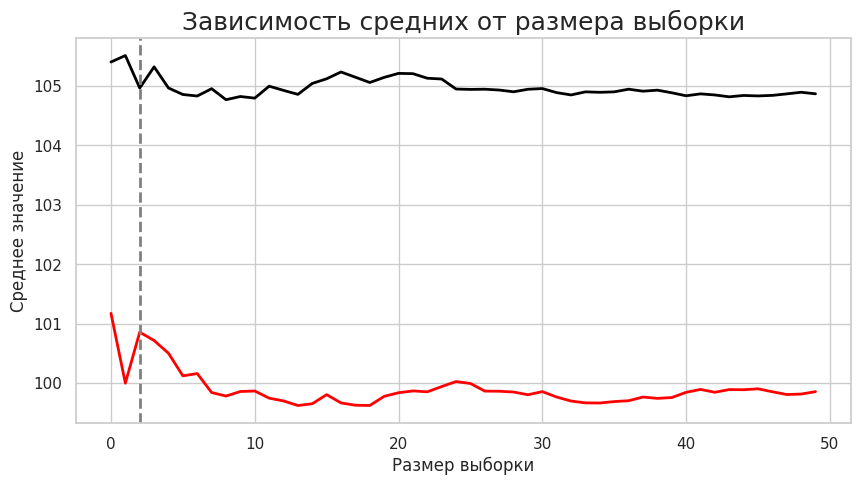

In [ ]:
# your code here
# (´｡• ᵕ •｡`)

plt.figure(figsize = (10, 5))
plt.plot(range(50), df['mean_a'], color='red', linewidth=2)
plt.plot(range(50), df['mean_b'], color='black', linewidth=2)
plt.axvline(2, color='grey', linestyle="--", linewidth=2)

plt.title("Зависимость средних от размера выборки", fontsize=18)
plt.ylabel("Среднее значение")
plt.xlabel("Размер выборки");

4. На основе `DataFrame` из предыдущего пункта постройте график динамики p-value по дням теста. Отложите вертикальную линию на этом же графике, показывающую кол-во дней, посчитанных в пункте 1. Сделайте эту линию пунктирной и измените цвет, который вам больше нравится. Также отложите горизонтальную линию – ваш уровень значимости $\alpha$.

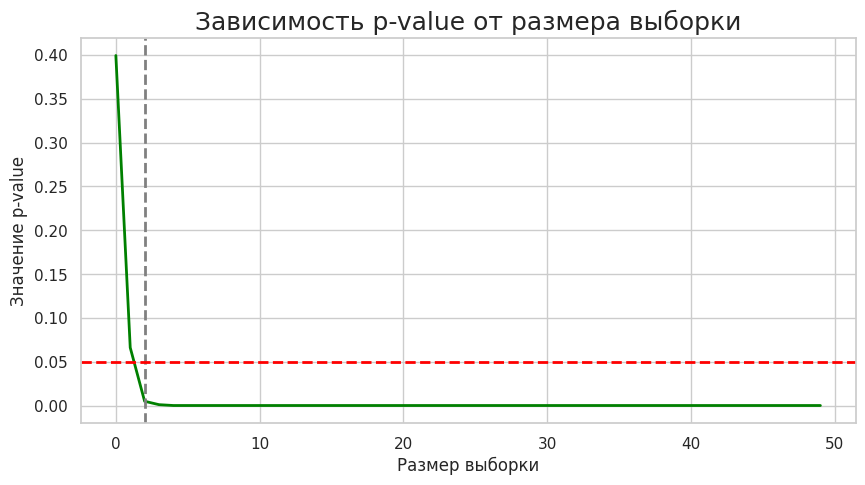

In [ ]:
# your code here
# (´｡• ᵕ •｡`)

plt.figure(figsize = (10, 5))
plt.plot(range(50), df['p_value'], color='green', linewidth=2)
plt.axvline(2, color='grey', linestyle='--', linewidth=2)
plt.axhline(0.05, color='red', linestyle='--', linewidth=2)

plt.title("Зависимость p-value от размера выборки", fontsize=18)
plt.ylabel("Значение p-value")
plt.xlabel("Размер выборки");

5. Перегенируруйте шаги 2-4 несколько раз, посмотрев на графики. Что вы видите? Что происходит с p-value в периодах:
    1. до кол-ва дней, посчитанных по формуле из п.1
    2. в точке кол-ва дней, посчитанных по формуле из п.1
    3. после кол-ва дней, посчитанных по формуле из п.1
    
    Опишите выводы максимально подробно.

In [ ]:
df_list = []

In [ ]:
# your thoughts here
# (◕‿◕)♡

A_list = np.array([])
B_list = np.array([])

A_full = A
B_full = B

df = pd.DataFrame({'mean_a': [A.mean()],
                   'mean_b': [B.mean()],
                   'p_value': [sts.ttest_ind(A, B)[-1]]})

A_list = np.append(A_list, A.mean())
B_list = np.append(B_list, B.mean())

for i in range(49):

    A = norm_rv_a.rvs(200)
    B = norm_rv_b.rvs(200)

    A_full = np.append(A_full, A)
    B_full = np.append(B_full, B)

    A_list = np.append(A_list, A.mean())
    B_list = np.append(B_list, B.mean())

    df.loc[len(df.index)] = [A_list.mean(), B_list.mean(), sts.ttest_ind(A_full, B_full)[-1]]

df_list.append(df)


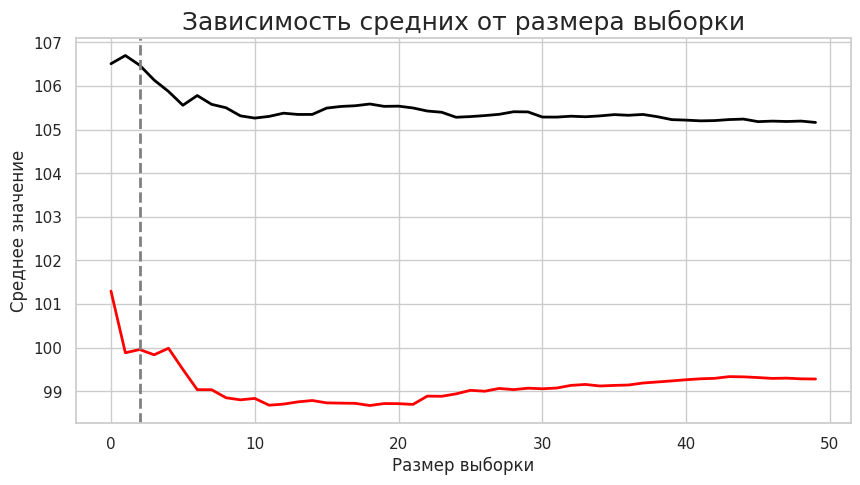

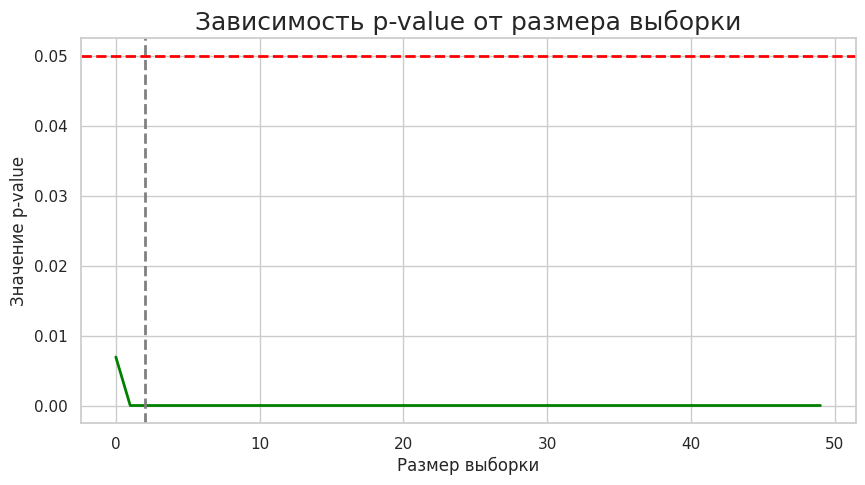

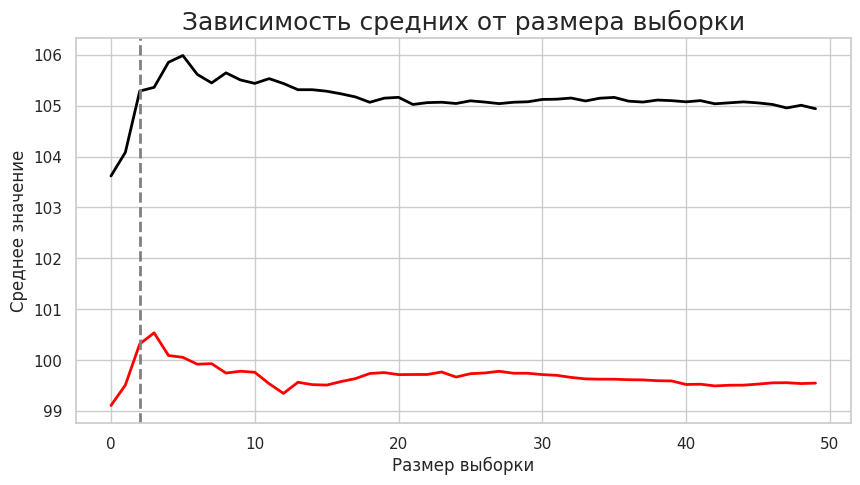

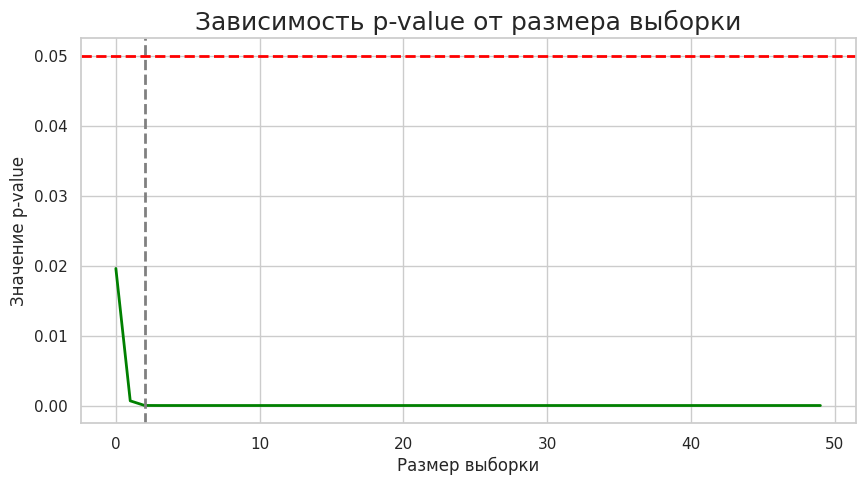

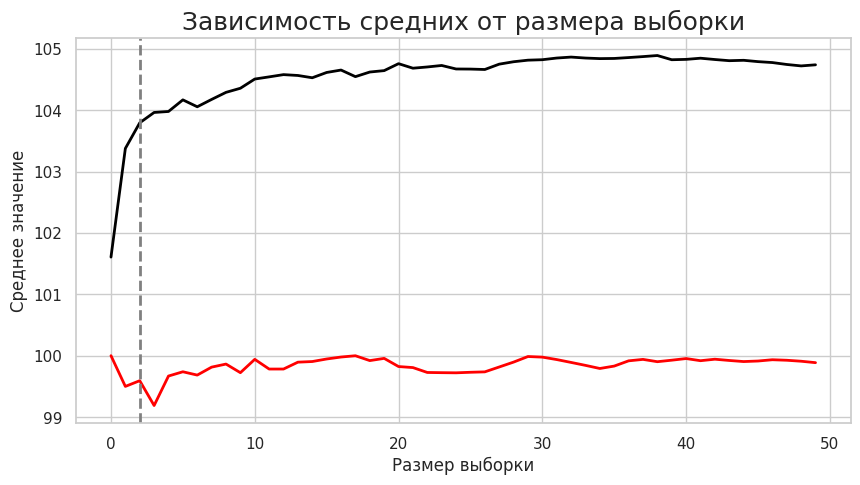

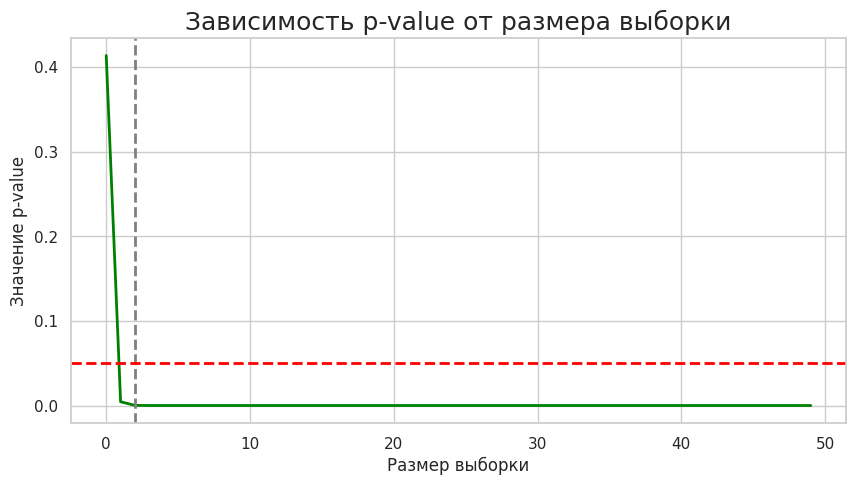

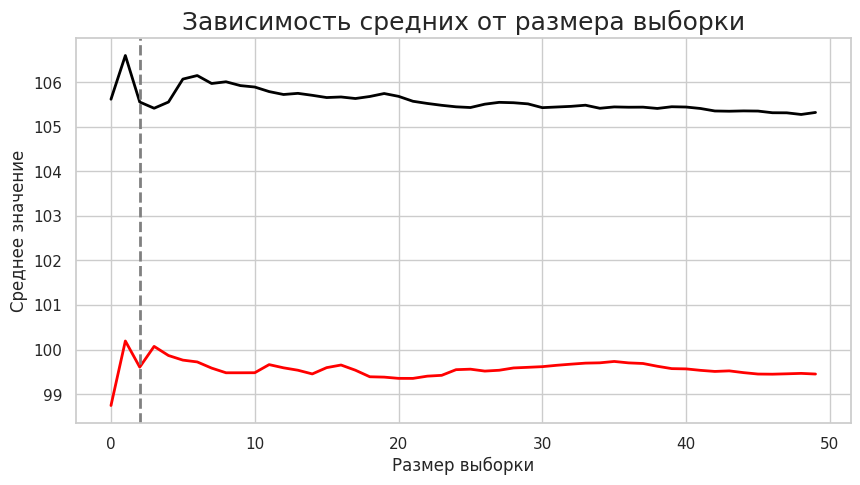

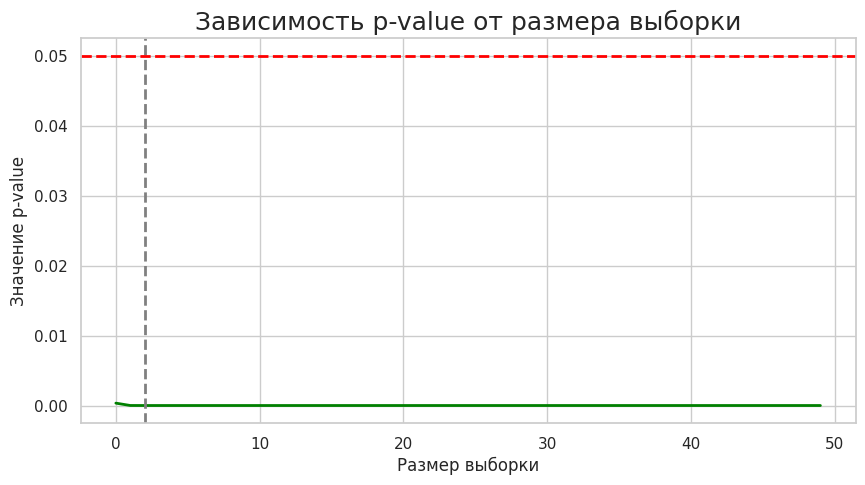

In [ ]:
for i in range(4):

    plt.figure(figsize = (10, 5))
    plt.plot(range(50), df_list[i]['mean_a'], color='red', linewidth=2)
    plt.plot(range(50), df_list[i]['mean_b'], color='black', linewidth=2)
    plt.axvline(2, color='grey', linestyle="--", linewidth=2)

    plt.title("Зависимость средних от размера выборки", fontsize=18)
    plt.ylabel("Среднее значение")
    plt.xlabel("Размер выборки");

    plt.figure(figsize = (10, 5))
    plt.plot(range(50), df_list[i]['p_value'], color='green', linewidth=2)
    plt.axvline(2, color='grey', linestyle='--', linewidth=2)
    plt.axhline(0.05, color='red', linestyle='--', linewidth=2)

    plt.title("Зависимость p-value от размера выборки", fontsize=18)
    plt.ylabel("Значение p-value")
    plt.xlabel("Размер выборки");

*Примечания* <br>
По данным графикам мы можем сделать весьма неоднозначные выводы: <br>

Во-первых, периодически распределение генерит такой случайный набор данных, который сразу попадает в необходимые нам значения, из-за чего p-value до 2 дней периодически может оказаться ниже уровня альфы <br>

Во-вторых, со второго для наблюдений оно начинает ассимптотически стремиться к нулю (проверил также на числовых данных, но удалил строку кода, чтобы не перегружать) <br>

В-третьих, мы можем проследить явную зависимость между значенииями средних и p-value в конкретных временных промежутках, особенно на первый день наблюдений, чем Уже между ними интервал, тем больше p-value и наоборот, однако начиная со второго дня наблюдений становится достаточно, чтобы p-value вело себя так, как задумано <br>

В итоге **Н0 отвергается**, учитывая, что у нас по сути проводится гипотеза о равенстве средних (при равных дисперсиях), которые ассимптотически сходятся к своим теоретическим значениям, такие результаты более чем логичны <br>

6. Теперь предположим, что мы поменяли наш $MDE$ до $1$ у.е. То есть мат. ожидание в группе А осталось по-прежнему $100$, а вот в группе Б теперь $101$. Перегенерируйте пункты 2-4 для измененного $MDE$, при этом кол-во дней в п.1 не пересчитывайте. Что происходит с p-value? Сделайте выводы.

In [ ]:
df_list = [] # очистим от старых наблюдений

In [ ]:
# your code and thoughts here
# ♡ (´｡• ω •｡`) ♡

norm_rv_b = sts.norm(loc=101, scale=20)

A_list = np.array([])
B_list = np.array([])

A_full = A
B_full = B

df = pd.DataFrame({'mean_a': [A.mean()],
                   'mean_b': [B.mean()],
                   'p_value': [sts.ttest_ind(A, B)[-1]]})

A_list = np.append(A_list, A.mean())
B_list = np.append(B_list, B.mean())

for i in range(49):

    A = norm_rv_a.rvs(200)
    B = norm_rv_b.rvs(200)

    A_full = np.append(A_full, A)
    B_full = np.append(B_full, B)

    A_list = np.append(A_list, A.mean())
    B_list = np.append(B_list, B.mean())

    df.loc[len(df.index)] = [A_list.mean(), B_list.mean(), sts.ttest_ind(A_full, B_full)[-1]]

df_list.append(df)


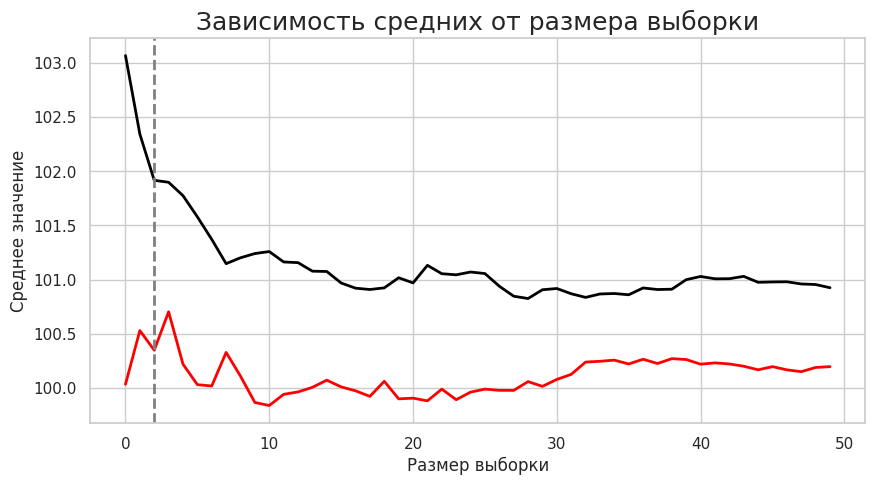

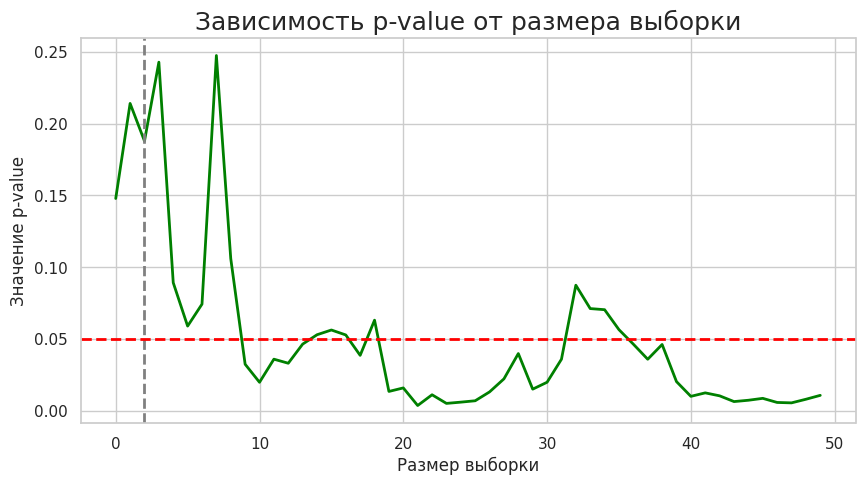

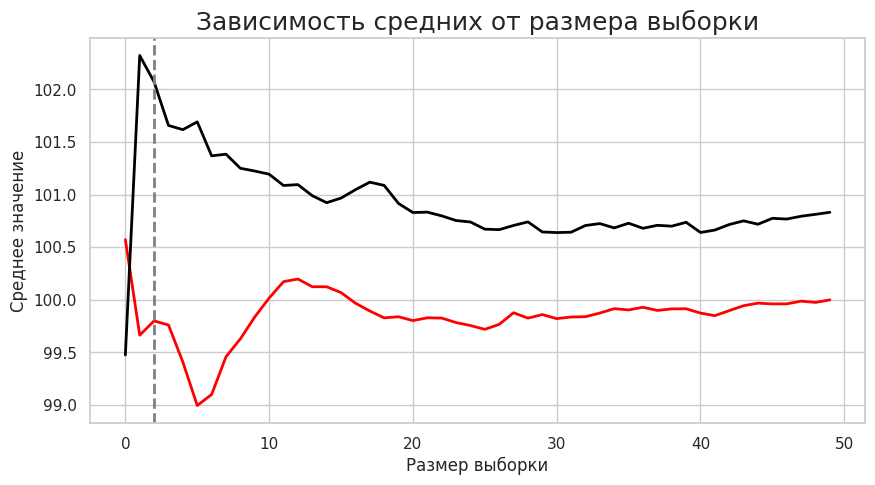

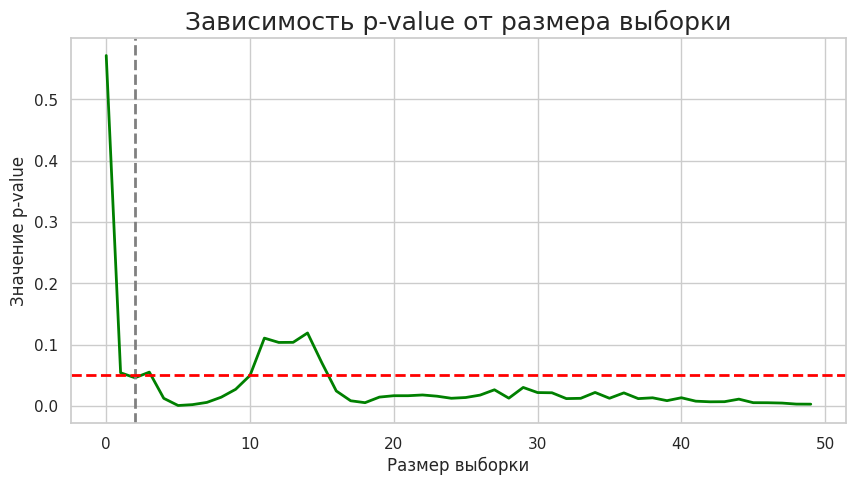

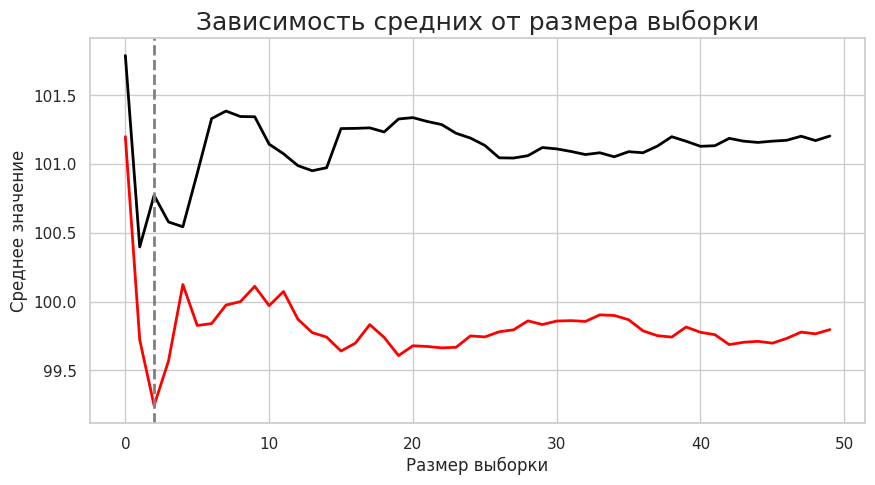

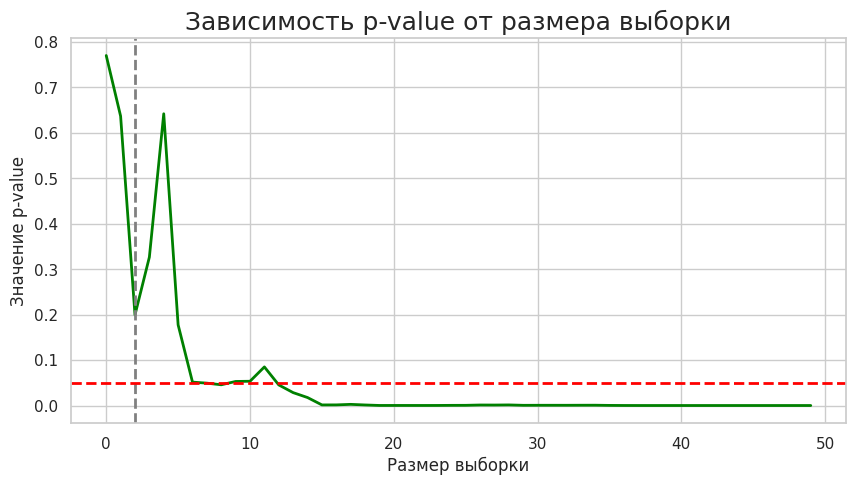

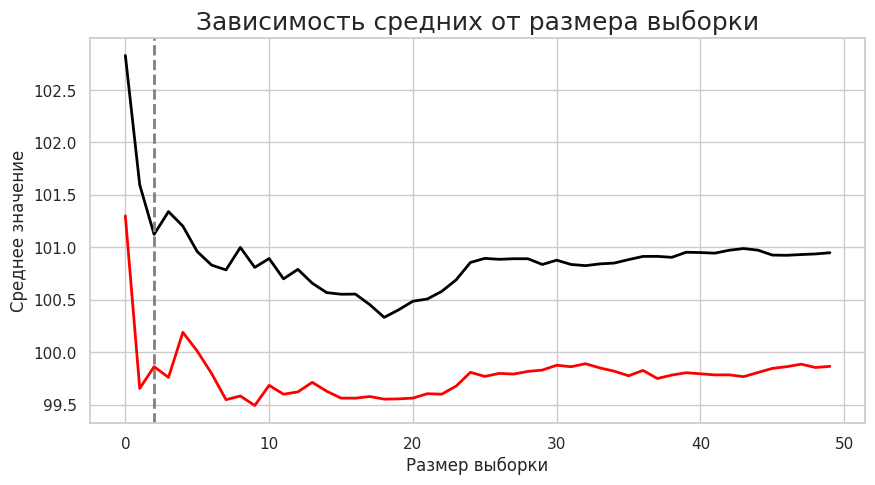

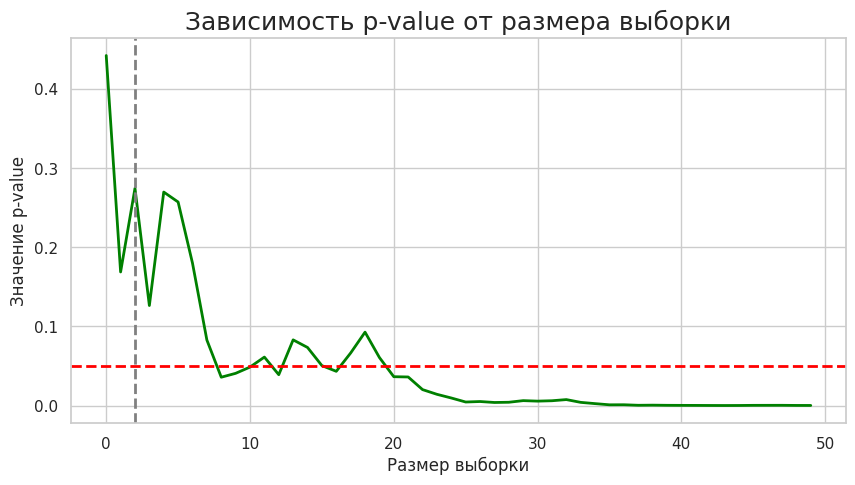

In [ ]:
for i in range(4):

    plt.figure(figsize = (10, 5))
    plt.plot(range(50), df_list[i]['mean_a'], color='red', linewidth=2)
    plt.plot(range(50), df_list[i]['mean_b'], color='black', linewidth=2)
    plt.axvline(2, color='grey', linestyle="--", linewidth=2)

    plt.title("Зависимость средних от размера выборки", fontsize=18)
    plt.ylabel("Среднее значение")
    plt.xlabel("Размер выборки");

    plt.figure(figsize = (10, 5))
    plt.plot(range(50), df_list[i]['p_value'], color='green', linewidth=2)
    plt.axvline(2, color='grey', linestyle='--', linewidth=2)
    plt.axhline(0.05, color='red', linestyle='--', linewidth=2)

    plt.title("Зависимость p-value от размера выборки", fontsize=18)
    plt.ylabel("Значение p-value")
    plt.xlabel("Размер выборки");

*Примечания* <br>

Тут работает принцип, что я мельком описал в прошлом подпункте. <br> Поскольку  разница меду матожиданиями становится Уже, тесту необходимо большее количество наблюдений для опровержения гипотезы, следственно увеличивается и временной период, необходимый для того, чтобы проследить разницу между ожиданием в 100 и 101, однако скорость их схождения к своим теоритическим значениям не изменяется. До этого дня 'x', p-value ведёт себя довольно непредсказуемо.

__с) [20баллов] Симуляция А/А-теста__

Теперь представим, что изменений на самом деле никаких нету, то есть мат. ожидание в обоих группах $100$, а $MDE = 0$

1. И снова перегенерируйте вышесделанные пункты 2-4. Что происходит с p-value? Может ли оно оказаться ниже уровня значимости?

In [ ]:
# your code and thoughts here
# =^･ｪ･^=

norm_rv_a = sts.norm(loc=100, scale=20)
norm_rv_b = sts.norm(loc=100, scale=20)

A = norm_rv_a.rvs(200)
B = norm_rv_b.rvs(200)

In [ ]:
A_list = np.array([]) # массив для кумулятивных средних
B_list = np.array([])

A_full = A # массив для всех генераций
B_full = B

df = pd.DataFrame({'mean_a': [A.mean()],
                   'mean_b': [B.mean()],
                   'p_value': [sts.ttest_ind(A, B)[-1]]}) # Фрейм в который мы всё сохраним

A_list = np.append(A_list, A.mean())
B_list = np.append(B_list, B.mean()) # апэнд первых значений

for i in range(49):

    A = norm_rv_a.rvs(200)
    B = norm_rv_b.rvs(200)

    A_full = np.append(A_full, A)
    B_full = np.append(B_full, B)

    A_list = np.append(A_list, A.mean())
    B_list = np.append(B_list, B.mean())

    df.loc[len(df.index)] = [A_list.mean(), B_list.mean(), sts.ttest_ind(A_full, B_full)[-1]]

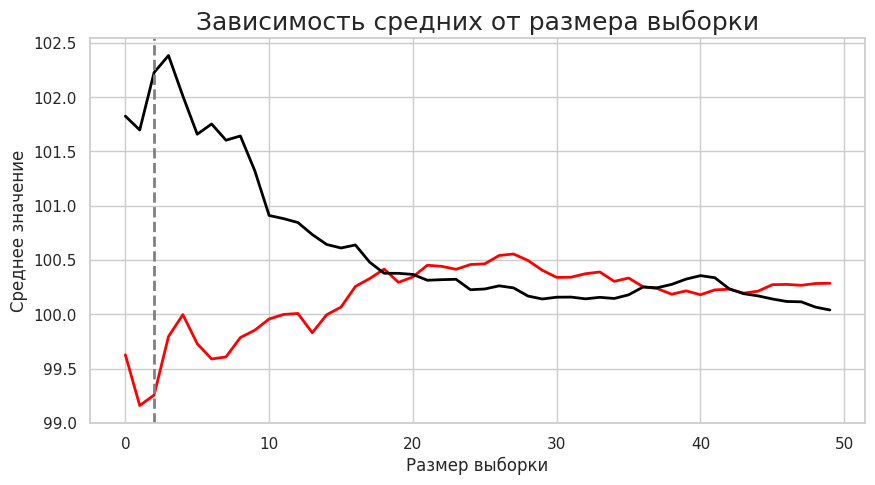

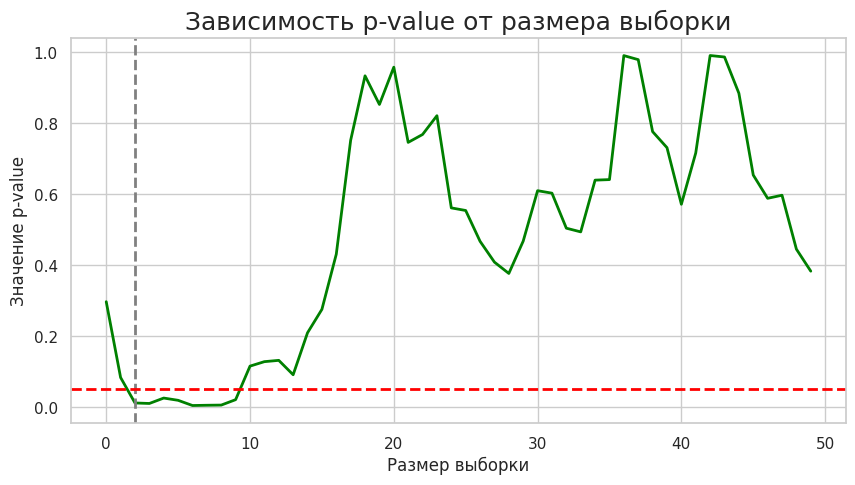

In [ ]:
plt.figure(figsize = (10, 5))
plt.plot(range(50), df['mean_a'], color='red', linewidth=2)
plt.plot(range(50), df['mean_b'], color='black', linewidth=2)
plt.axvline(2, color='grey', linestyle="--", linewidth=2)

plt.title("Зависимость средних от размера выборки", fontsize=18)
plt.ylabel("Среднее значение")
plt.xlabel("Размер выборки");

plt.figure(figsize = (10, 5))
plt.plot(range(50), df['p_value'], color='green', linewidth=2)
plt.axvline(2, color='grey', linestyle='--', linewidth=2)
plt.axhline(0.05, color='red', linestyle='--', linewidth=2)

plt.title("Зависимость p-value от размера выборки", fontsize=18)
plt.ylabel("Значение p-value")
plt.xlabel("Размер выборки");

*Примечание*

Как мы видим, в первом периоде остаётся некоторая доля неопределённости из-за неодстатка данных, p-value всё также ведёт себя непредсказуемо, может оказаться ниже уровня значимости, а может почти равняться единицы. <br>
В дальнейшем с ростом числа наблюдений наши графики начнут сходится к теории, а следственно и друг к другу, потому p-value будет стремиться к единице

2. Ну и напоследок, напишите функцию, которая генерирует p-value на последний день A/A теста. А затем запустите эту функцию $1000$ раз, собрав $1000$ значений p-value. Постройте гистограмму их распределения. Что вы видите?

__Подсказка:__ Для такой функции достаточно создать выборку один раз, изменив ее размер.

In [ ]:
# your code and thoughts here
# C (・_・)ノ

norm_rv_a = sts.norm(loc=100, scale=20)
norm_rv_b = sts.norm(loc=100, scale=20)

A = norm_rv_a.rvs(200)
B = norm_rv_b.rvs(200)



In [ ]:
# Дедлайн поджимает, я не парился над оптимизацией...

def p_value_AA(norm_rv_a = sts.norm(loc=100, scale=20),
               norm_rv_b = sts.norm(loc=100, scale=20)):

  A = norm_rv_a.rvs(200)
  B = norm_rv_b.rvs(200)

  p_val_lst = []

  A_full = A # массив для всех генераций
  B_full = B

  for i in range(49):

    A = norm_rv_a.rvs(200)
    B = norm_rv_b.rvs(200)

    A_full = np.append(A_full, A)
    B_full = np.append(B_full, B)

    p_val_lst.append(sts.ttest_ind(A_full, B_full)[-1])

  return p_val_lst[-1]

In [ ]:
# Код работает +- 30 секунд

p_val_lst = []

for i in range(1000):
    p_val_lst.append(p_value_AA(norm_rv_a))

In [ ]:
min(p_val_lst) # таких выбросов не было бы, если бы мы увеличили количество дней

0.00011702666901505516

In [ ]:
np.mean(p_val_lst)

0.4990810112614153

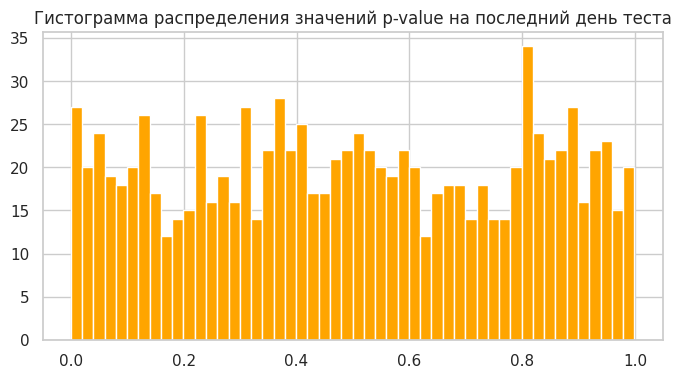

In [ ]:
plt.hist(p_val_lst, bins=50, color='orange')
plt.title('Гистограмма распределения значений p-value на последний день теста');

*Примечание*

Как мы можем видеть, распределилось оно +- равномерно, однако тут также можно сказать, что в большей части случаев Н0 уже не отвегается, если увеличить рассматриваемый промежуток, то p-value вероятно будет в основном на правой стороне графика, в принципе мне ничего не мешает проверить данное утверждение, давайте интереса ради рассмотрим, что произойдёт, если увеличить количество рассматриваемых дней вдвое

In [ ]:
def p_value_AA(norm_rv_a = sts.norm(loc=100, scale=20),
               norm_rv_b = sts.norm(loc=100, scale=20)):

  A = norm_rv_a.rvs(200)
  B = norm_rv_b.rvs(200)

  p_val_lst = []

  A_full = A # массив для всех генераций
  B_full = B

  for i in range(100):

    A = norm_rv_a.rvs(200)
    B = norm_rv_b.rvs(200)

    A_full = np.append(A_full, A)
    B_full = np.append(B_full, B)

    p_val_lst.append(sts.ttest_ind(A_full, B_full)[-1])

  return p_val_lst[-1]

In [ ]:
p_val_lst_1 = []

for i in range(1000):
    p_val_lst_1.append(p_value_AA(norm_rv_a))

In [ ]:
min(p_val_lst_1)

0.0014621207360551326

In [ ]:
np.mean(p_val_lst_1)

0.5132400850233471

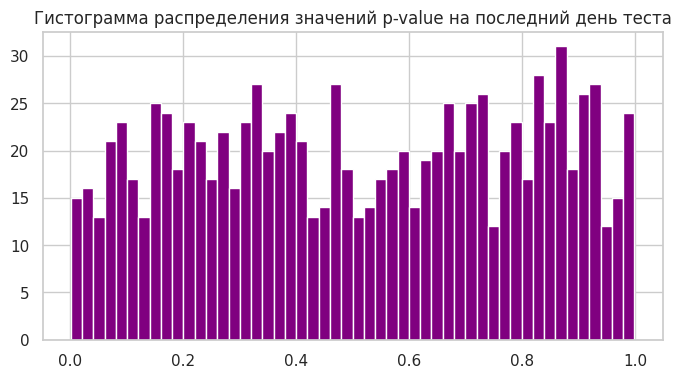

In [ ]:
plt.hist(p_val_lst_1, bins=50, color='purple')
plt.title('Гистограмма распределения значений p-value на последний день теста');

*Последнее примечание :(*

Чуть выросло среднее и минимальное значения стало больше, но существенных графических изменнеий не видно <br>
Быть может моё утверждение несло ложный характер, но на проверку или опровержение мне не хватит производственных мощностей, как бы там ни было, на поставленный вопрос я вроде бы ответил, возможно даже сверх того, на этом моменте поставлю последнюю точку в последней домаше по андану, спасибо за проверку, успехов на сессии!


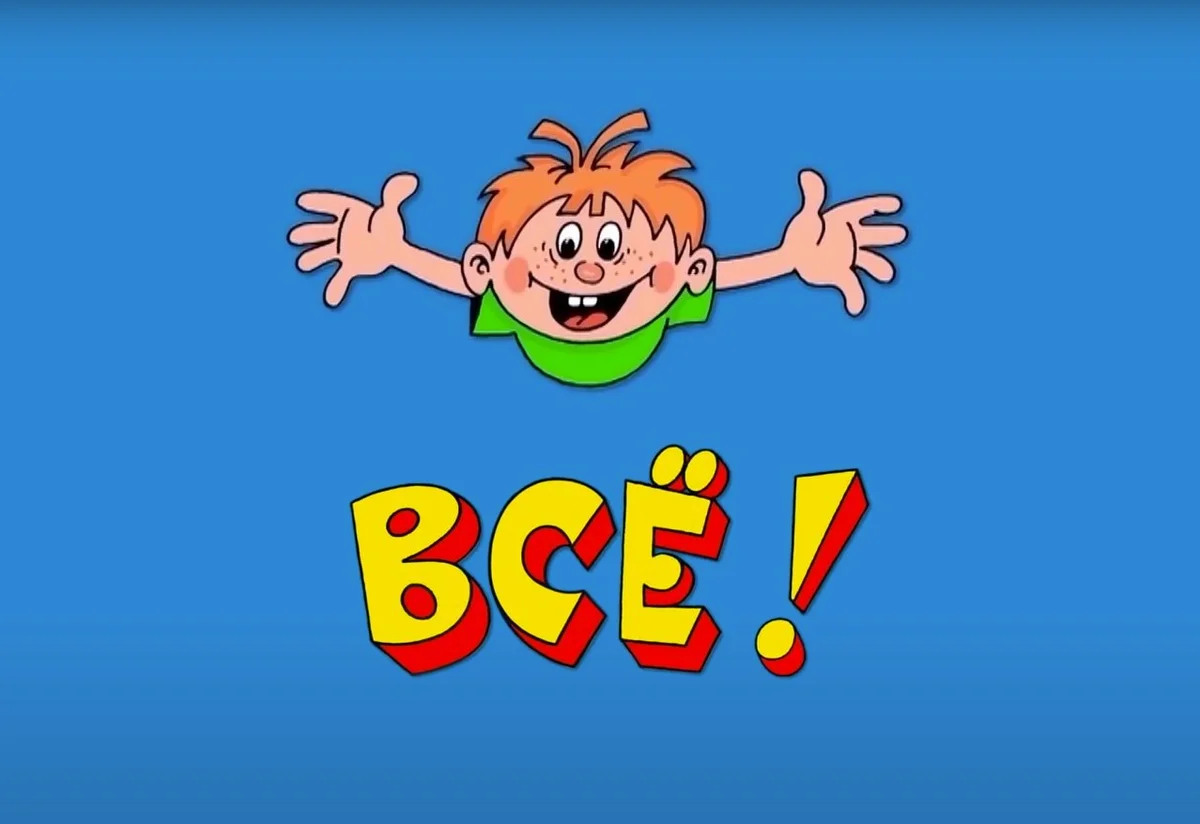